In [1]:
import datajoint as dj

In [2]:
import ephys
import matplotlib.pyplot as plt
%matplotlib inline

Connecting daveliu@mesoscale-activity.datajoint.io:3306


In [ ]:
def dropdbs():
   print('dropping databases')
   for a in range(3):
       for d in ['ingest', 'ccf', 'ephys', 'experiment', 'lab']:
           try:
               schema = dj.schema(dj.config['%s.database' % d], locals())
               schema.drop(force=True)
           except Exception as e:
               print('error dropping {d} in attempt {a}: {e}'
                     .format(d=d, a=a, e=str(e)))
               pass

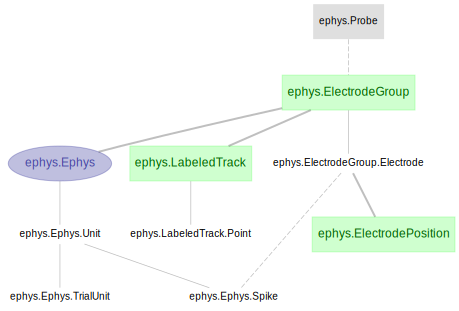

In [3]:
dj.ERD(ephys)

In [5]:
session=ephys.experiment.Session()

In [6]:
session

animal Janelia ANM ID (6 digits),session session number,session_date,username,rig,behavior_file the behavior file name


In [7]:
person=ephys.experiment.lab.Person()
#person.insert1(('daveliu', 'Dave Liu'))
person

username,fullname


In [14]:
rig=ephys.experiment.lab.Rig()
#rig.insert1(('TRig2', 'Training rig 2'))
rig

rig,rig_description
RRig,Recording rig
TRig1,Training rig 1
TRig2,Training rig 2


In [9]:
animalWaterRestriction=ephys.experiment.lab.AnimalWaterRestriction()
#animalWaterRestriction.insert1((123456, 'tw5'))
animalWaterRestriction

animal Janelia ANM ID (6 digits),water_restriction water restriction number


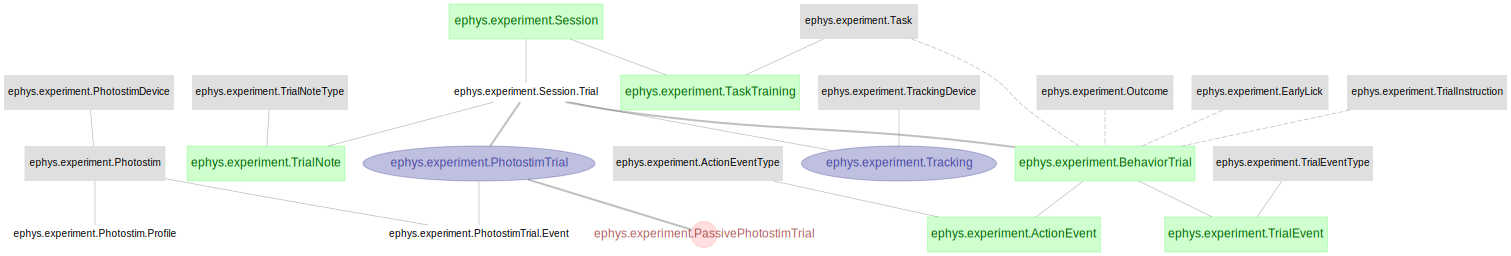

In [10]:
dj.ERD(ephys.experiment)

In [16]:
import ingest
rigDataPath = ingest.RigDataPath()
rigDataFile = ingest.RigDataFile()

In [23]:
#importedSessionFile.drop()
rigDataFile.populate()

TypeError: unsupported operand type(s) for &: 'OrderedClass' and 'dict'

In [19]:
rigDataPath

rig,rig_data_path rig data path
RRig,H:\\data\bpodRecord
TRig1,R:\\Arduino\Bpod_Train1\Bpod Local\Data
TRig2,S:\\MATLAB\Bpod Local\Data


In [20]:
rigDataFile

rig,rig_data_file rig file subpath


In [ ]:
session=ephys.experiment.Session()
session

In [ ]:
trialNote = ephys.experiment.TrialNote()

In [ ]:
import numpy as np

In [ ]:
behaviorTrial = ephys.experiment.BehaviorTrial()

In [ ]:
outcome = (behaviorTrial & 'animal = 399752').fetch('outcome', order_by='session')
early_lick = (behaviorTrial & 'animal = 399752').fetch('early_lick', order_by='session')

In [ ]:
data = np.zeros(len(outcome))
data1 = np.zeros(len(early_lick))
data2 = np.zeros(len(outcome))

In [ ]:
data[outcome=='hit'] = 1
data1[early_lick=='early'] = 1
data2[outcome=='ignore'] = 1

In [ ]:
trial_note = (trialNote & 'animal = 123456').fetch('trial_note', order_by='session')
results = list(map(int, trial_note))
protDiff = np.diff(results)
protChange = np.where(protDiff != 0)

In [ ]:
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

In [ ]:
yMA = movingaverage(data,200)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Proportion Correct')
for i in range(0, len(protChange[0])):
    plt.axvline(protChange[0][i], linewidth=4, color='r')


In [ ]:
yMA = movingaverage(data1,200)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Early Licks')
for i in range(0, len(protChange[0])):
    plt.axvline(protChange[0][i], linewidth=4, color='r')


In [ ]:
yMA = movingaverage(data2,20)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Ignores')
for i in range(0, len(protChange[0])):
    plt.axvline(protChange[0][i], linewidth=4, color='r')
plt.savefig('')

In [ ]:
len(outcome)